In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

## lucas kanade

In [4]:
## Change video name here
cap = cv.VideoCapture('Building Dataset/video x1.mp4')
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv.add(frame, mask)
    plt.imshow(img)
    plt.show()
    clear_output(wait=True)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv.destroyAllWindows()

No frames grabbed!


## Dense optical flow

In [1]:
import cv2 as cv
import numpy as np
  
  
# The video feed is read in as
# a VideoCapture object
cap = cv.VideoCapture("Building Dataset/video x1.mp4")
  
# ret = a boolean return value from
# getting the frame, first_frame = the
# first frame in the entire video sequence
ret, first_frame = cap.read()
  
# Converts frame to grayscale because we
# only need the luminance channel for
# detecting edges - less computationally 
# expensive
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
  
# Creates an image filled with zero
# intensities with the same dimensions 
# as the frame
mask = np.zeros_like(first_frame)
  
# Sets image saturation to maximum
mask[..., 1] = 255
  
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()
cv.destroyAllWindows()

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\highgui\src\window.cpp:352: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


: 

## horn schunck

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from time import sleep
# Path to video file
vidObj = cv2.VideoCapture('Building Dataset/video x2.mp4')
  
# Used as counter variable
count = 0
  
# checks whether frames were extracted
success = 1

#list of images
images = []
while success:
  
    # vidObj object calls read
    # function extract frames
    success, image = vidObj.read()
    images.append(image)

'''for x in images:
    # Saves the frames with frame-count
    cv2.imwrite("frame%d.jpg" % count, x)
    count += 1'''

def horn_schunck(img1,img2):
    img1 = cv2.cvtColor(img1,cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (640, 320))
    img2 = cv2.resize(img2, (640, 320))
    M = np.zeros((2,3), dtype = np.float32)

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray1, cmap = 'gray')
    plt.imshow(gray2, cmap = 'gray')
    gray_diff = cv2.subtract(gray1, gray2)
    #plt.imshow(gray_diff, cmap = 'gray')
    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 5, 15,  3,  5,  1.2, 0)
    hsv = np.zeros( (320,640,3), dtype = np.uint8)
    hsv[...,1] = 255
    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    plt.imshow(rgb)


    
    

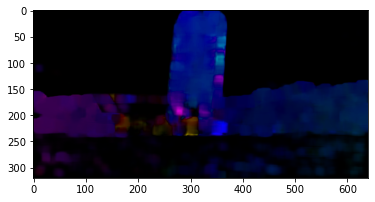

In [43]:
x=50
horn_schunck(images[x],images[x+1])